# Analysis of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv("CollegeRankingsData.csv")
data.head()

,College,State,OutStateTuition,Type,MathSAT,VerbalSAT,PercAccepted,PercEnrolled,NumberFTUGs,NumberPTUGs,RoomBoardCosts,BookCosts,FacultyPhDs,StuFacRatio,Expenditure,GradRate,id
0,Alaska Pacific University,AK,7560,Private,6,6,0.756,0.377,249,869,4120,800,0.76,11.9,10922,0.15,1
1,Auburn University-Main Campus,AL,6300,Public,8,7,0.900,0.452,16262,1716,3933,600,0.85,16.7,6642,0.69,2
2,Birmingham-Southern College,AL,11660,Private,8,7,0.730,0.488,1376,207,4325,400,0.74,14.0,8649,0.72,3
3,Huntingdon College,AL,8080,Private,7,5,0.855,0.244,538,126,3920,500,0.63,11.4,7703,0.44,4
4,Spring Hill College,AL,11478,Private,7,6,0.898,0.331,942,224,4788,500,0.80,14.4,8594,0.70,5


TypeError: hist() got multiple values for argument 'x'

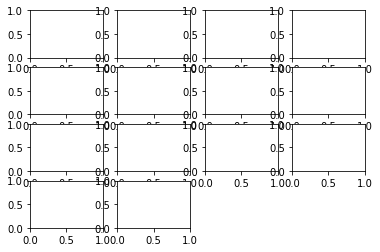

In [9]:
data.hist(x="PercAccepted", title="Distribution of Accepted Applicants")

This distribution shows that colleges tend to accept most applicants.

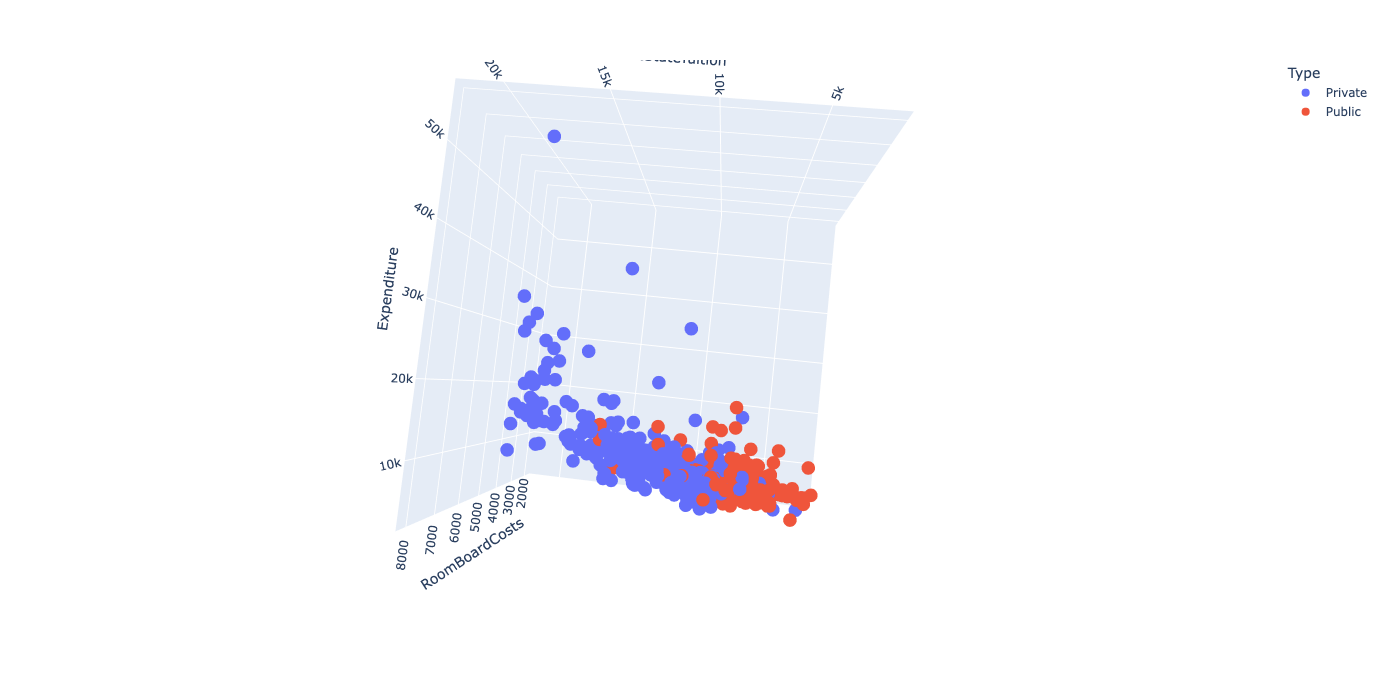

In [18]:
fig = px.scatter_3d(data, x = "OutStateTuition", y = "RoomBoardCosts",
                    z = "Expenditure", color="Type", width=800, height=700)
fig.show()

3D scatter plots are always cool to look at, and with Jupyter Book you can perform your analysis and share it with the world! This particular scatter plot shows us there may be some relationship between `OutStateTuition` and `Expenditure`.

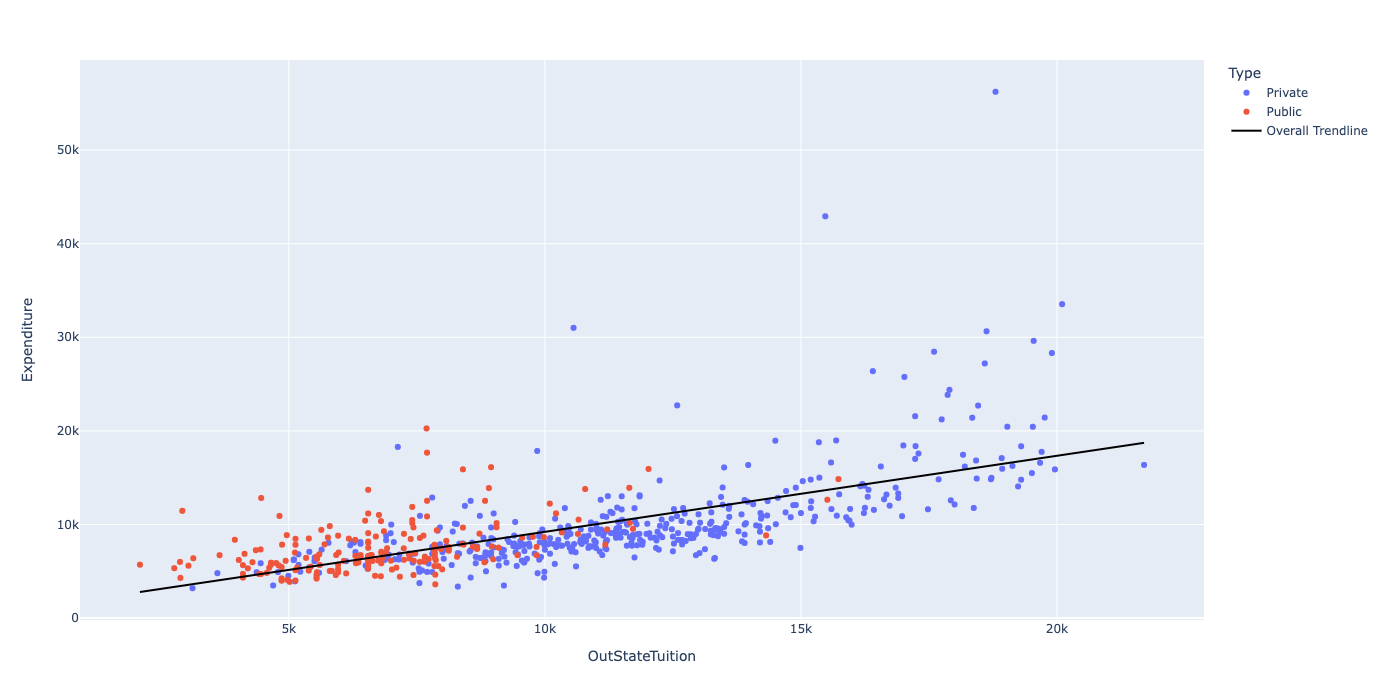

In [30]:
fig = px.scatter(data, x = "OutStateTuition", y = "Expenditure", color="Type",
                 trendline="ols", trendline_scope="overall", trendline_color_override="black",
                 width=800, height=700)
fig.show()

Here we fit a linear regresssion to these variables, and we are able to obtain the regression statistics from it as well. They are shown below.

In [36]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     499.4
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.81e-82
Time:                        20:51:12   Log-Likelihood:                -6143.1
No. Observations:                 640   AIC:                         1.229e+04
Df Residuals:                     638   BIC:                         1.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1085.6066    397.469      2.731      0.006     305.102    1866.112
x1             0.8128      0.036     22.347      0.000       0.741       0.884
==============================================================================
Omnibus:                      626.574   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32959.100
Skew:                           4.311   Prob(JB):                         0.00
Kurtosis:                      37.083   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is not very high at only 0.439, but both coefficients have p-values way below 5% which indicates the linear relationship is statistically significant.

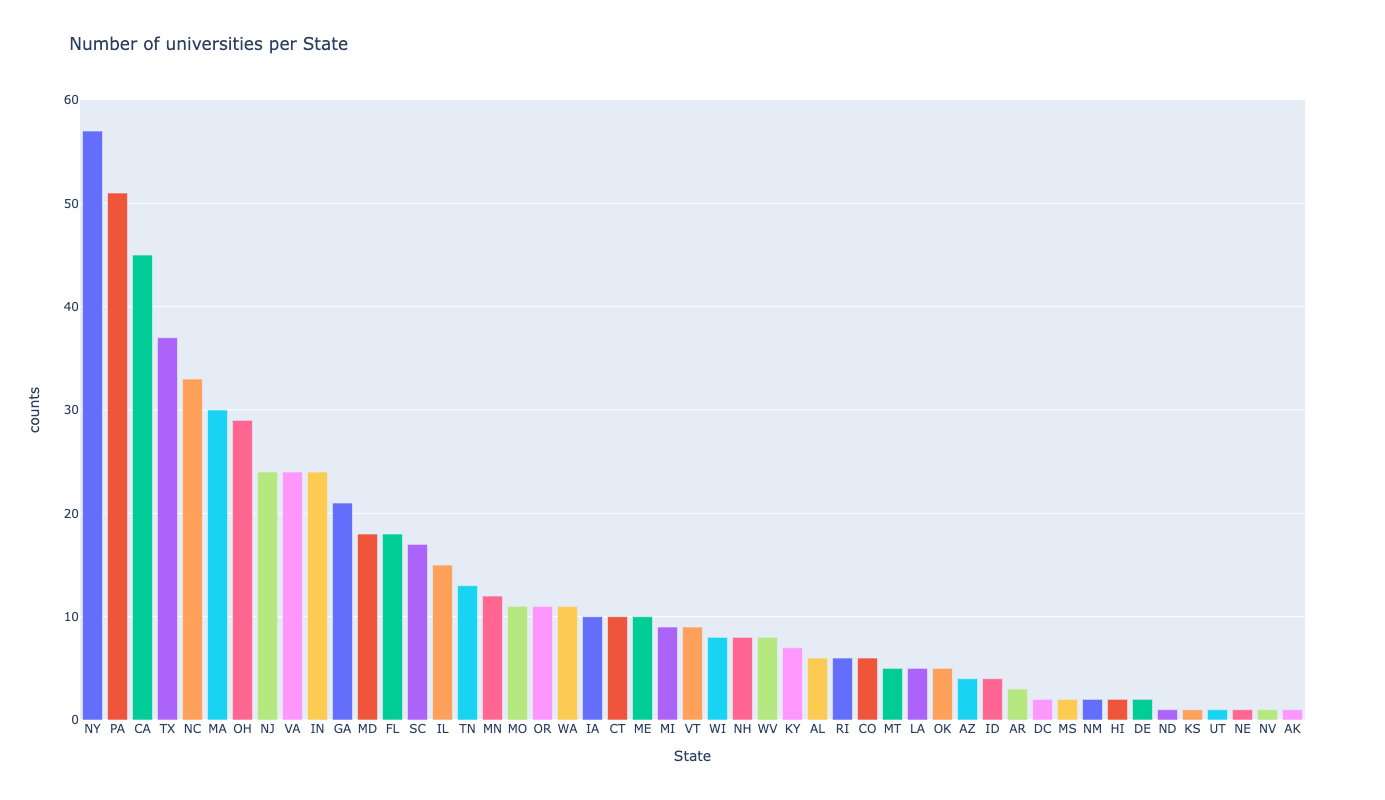

In [58]:
schoolsPerState = data.groupby("State").size().reset_index(name='counts').sort_values("counts",ascending=False)

fig = px.bar(schoolsPerState, y='counts', x='State', color="State",
             title='Number of universities per State',
             width=900, height=800).update_layout(showlegend=False)
fig.show()

Here is a pretty chart displaying the number of colleges in each state.